## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./assets/real_estate.csv", sep=";")
#df.shape == (15335, 37)

#### What is the most expensive home in the dataset? (★☆☆)

In [2]:
most_exp_home = df.loc[df['price'].idxmax()]
print(f'The most expensive home in the dataset costs {most_exp_home["price"]}')

The most expensive home in the dataset costs 8500000


#### What is cheapest home in the dataset? (★☆☆)

In [3]:
cheapest_home = df.loc[df['price'].idxmin()]
print(f'The cheapest home in the dataset costs {cheapest_home["price"]}')

The cheapest home in the dataset costs 0


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [4]:
biggest_home = df.loc[df['surface'].idxmax()]
smallest_home = df.loc[df['surface'].idxmin()]

print(f'The biggest home in the dataset has a surface of {biggest_home["surface"]} m2')
print(f'The smallest home in the dataset has a surface of {smallest_home["surface"]} m2')

The biggest home in the dataset has a surface of 249000.0 m2
The smallest home in the dataset has a surface of 15.0 m2


#### How many populations (level5) the dataset contains? (★☆☆)

In [5]:
total_of_populations = len(df['level5'].unique())
print(f'There are {total_of_populations} populations in the dataset')

There are 168 populations in the dataset


#### Does the dataset contain NAs? (★☆☆)


In [6]:
are_there_nas = df.isnull().values.any()
print('The dataset contains NAs')

The dataset contains NAs


#### Delete the NAs of the dataset, if applicable (★★☆)

In [7]:
#the columns zipCode and customZone only contains NAs so we procede to delete them
zipCode_column_all_NA = df['zipCode'].isnull().values.all()
customZone_column_all_NA = df['customZone'].isnull().values.all()

df = df.dropna(axis=1, how='all')

#There are rows with specific values that are NAs but there are not going to be deleted

#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [8]:
mean_price_arroyomolinos = df['price'][df['level5'] == 'Arroyomolinos (Madrid)'].mean()
print(f'The mean of prices in the population of Arroyomolinos is {mean_price_arroyomolinos}')

The mean of prices in the population of Arroyomolinos is 294541.59854014596


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

The mayority of the prices are around the mean calculated previously, looking somehow like a normal distribution


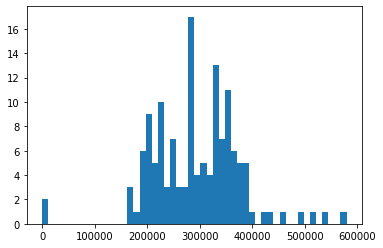

In [9]:
prices_arroyomolinos = df['price'][df['level5'] == 'Arroyomolinos (Madrid)'].values
plt.hist(prices_arroyomolinos, bins = 50)
print('The mayority of the prices are around the mean calculated previously, looking somehow like a normal distribution')

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [10]:
populations = np.array(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])

bool_array = np.where((df['level5'] == populations[0]) | (df['level5'] == populations[1]) | (df['level5'] == populations[2]) | (df['level5'] == populations[3]))
south_belt = df.loc[bool_array]
# south_belt.shape == (907, 35)

#### Make a bar plot of the median of prices (★★★) 

<BarContainer object of 4 artists>

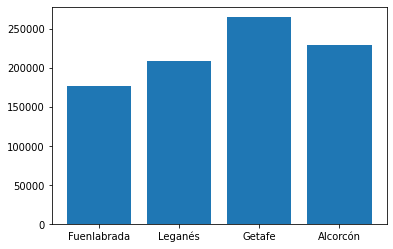

In [11]:
mean_prices = np.empty(4)

for population in populations:
    mean_prices[np.where(populations == population)] = (south_belt['price'][south_belt['level5'] == population].mean())

plt.bar(populations, mean_prices)

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [12]:
means = np.empty(4)
vars = np.empty(4)
variables = np.array(['price', 'rooms', 'surface', 'bathrooms'])

for variable in variables:
    means[np.where(variables == variable)] = south_belt[variable].mean()
    vars[np.where(variables == variable)] = south_belt[variable].var()

for i in range(4):
    print(f'Mean price: {means[i]}, Variance price: {vars[i]}')

Mean price: 223094.48070562293, Variance price: 14921367508.04902
Mean price: 3.0177383592017737, Variance price: 0.7188858892927542
Mean price: 111.75222363405337, Variance price: 4263.051760316337
Mean price: 1.633221850613155, Variance price: 0.5717968625577321


#### What is the most expensive home of each population? (★★☆) 

In [13]:
most_exp_homes = np.empty(4, dtype=int)

for population in populations:
    population_data = south_belt[south_belt['level5'] == population]
    most_exp_homes[np.where(populations == population)] = population_data.loc[population_data['price'].idxmax()]['price']

for i in range(4):
    print(f'Most expensive home of {populations[i]} costs: {most_exp_homes[i]}')

Most expensive home of Fuenlabrada costs: 490000
Most expensive home of Leganés costs: 650000
Most expensive home of Getafe costs: 1050000
Most expensive home of Alcorcón costs: 950000


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

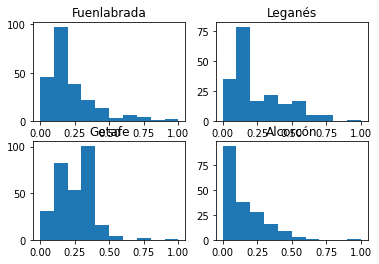

In [14]:
def normalized_prices(population, position):
    population_data = south_belt['price'][south_belt['level5'] == population]
    max_price = population_data.loc[population_data.idxmax()]
    min_price = population_data.loc[population_data.idxmin()]
    normalized = (population_data - min_price)/(max_price - min_price)
    plt.subplot(2, 2, position)
    plt.hist(normalized)
    plt.title(population)

for population in populations:
    normalized_prices(population, int(np.where(populations == population)[0] + 1))

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [71]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (40.30, -3.6), zoom = 10, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[40.3, -3.6], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

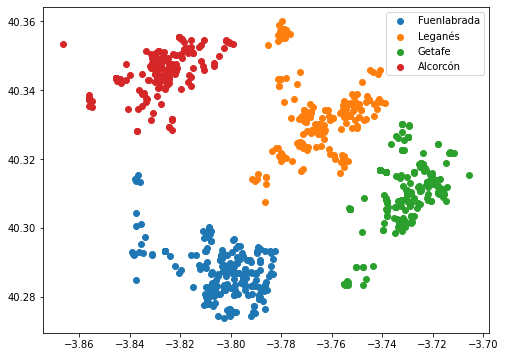

In [64]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:

fig, ax = plt.subplots(figsize=(8,6))

longitudes_fuenlabrada = np.array([float(i.replace(',', '.')) for i in south_belt['longitude'][south_belt['level5'] == populations[0]]])
longitudes_leganes = np.array([float(i.replace(',', '.')) for i in south_belt['longitude'][south_belt['level5'] == populations[1]]])
longitudes_getafe = np.array([float(i.replace(',', '.')) for i in south_belt['longitude'][south_belt['level5'] == populations[2]]])
longitudes_alcorcon = np.array([float(i.replace(',', '.')) for i in south_belt['longitude'][south_belt['level5'] == populations[3]]])

latitudes_fuenlabrada = np.array([float(i.replace(',', '.')) for i in south_belt['latitude'][south_belt['level5'] == populations[0]]])
latitudes_leganes = np.array([float(i.replace(',', '.')) for i in south_belt['latitude'][south_belt['level5'] == populations[1]]])
latitudes_getafe = np.array([float(i.replace(',', '.')) for i in south_belt['latitude'][south_belt['level5'] == populations[2]]])
latitudes_alcorcon = np.array([float(i.replace(',', '.')) for i in south_belt['latitude'][south_belt['level5'] == populations[3]]])

#delete values equal to zero
longitudes_getafe = np.delete(longitudes_getafe, np.where(longitudes_getafe == 0)[0])
longitudes_alcorcon = np.delete(longitudes_alcorcon, np.where(longitudes_alcorcon == 0)[0])
latitudes_getafe = np.delete(latitudes_getafe, np.where(latitudes_getafe == 0)[0])
latitudes_alcorcon = np.delete(latitudes_alcorcon, np.where(latitudes_alcorcon == 0)[0])

ax.scatter(longitudes_fuenlabrada, latitudes_fuenlabrada, label='Fuenlabrada')
ax.scatter(longitudes_leganes, latitudes_leganes, label='Leganés')
ax.scatter(longitudes_getafe, latitudes_getafe, label='Getafe')
ax.scatter(longitudes_alcorcon, latitudes_alcorcon, label='Alcorcón')
ax.legend()


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

The price/m2 of Alcorcon is greater than the price/m2 of Getafe


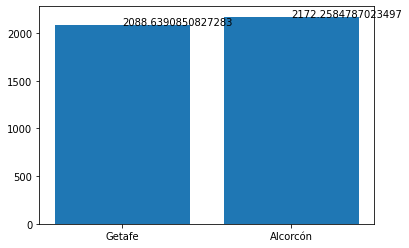

In [ ]:
mean_price_getafe = south_belt['price'][south_belt['level5'] == populations[2]].mean()
mean_price_alcorcon = south_belt['price'][south_belt['level5'] == populations[3]].mean()

mean_surface_getafe = south_belt['surface'][south_belt['level5'] == populations[2]].mean()
mean_surface_alcorcon = south_belt['surface'][south_belt['level5'] == populations[3]].mean()

price_m2_getafe = mean_price_getafe / mean_surface_getafe
price_m2_alcorcon = mean_price_alcorcon / mean_surface_alcorcon

plt.bar(populations[2:], [price_m2_getafe, price_m2_alcorcon])
plt.text(populations[2], price_m2_getafe, price_m2_getafe)
plt.text(populations[3], price_m2_alcorcon, price_m2_alcorcon)

print('The price/m2 of Alcorcon is greater than the price/m2 of Getafe')

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

The average price of Valdemorillo is greater than the average price of Galapagar


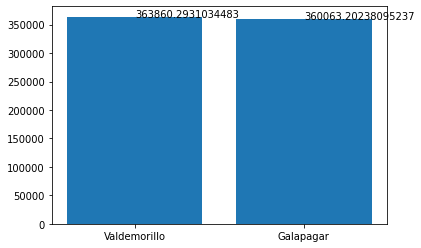

In [ ]:
#as long as there are no specified weights for the values, .mean() and .average() return the same value

mean_price_valdemorillo = df['price'][df['level5'] == 'Valdemorillo'].mean()
mean_price_galapagar = df['price'][df['level5'] == 'Galapagar'].mean()

plt.bar(['Valdemorillo', 'Galapagar'], [mean_price_valdemorillo, mean_price_galapagar])
plt.text('Valdemorillo', mean_price_valdemorillo, mean_price_valdemorillo)
plt.text('Galapagar', mean_price_galapagar, mean_price_galapagar)
print('The average price of Valdemorillo is greater than the average price of Galapagar')

#### What happens if we do the same analysis for price/m2 (★★☆) 

The price/m2 of Galapagar is greater than the price/m2 of Valdemorillo


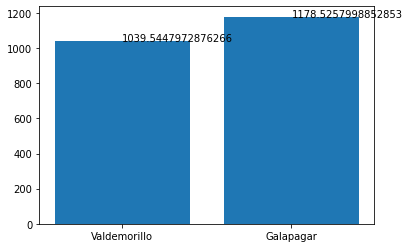

In [ ]:
mean_surface_valdemorillo = df['surface'][df['level5'] == 'Valdemorillo'].mean()
mean_surface_galapagar = df['surface'][df['level5'] == 'Galapagar'].mean()

price_m2_valdemorillo = mean_price_valdemorillo / mean_surface_valdemorillo
price_m2_galapagar = mean_price_galapagar / mean_surface_galapagar

plt.bar(['Valdemorillo', 'Galapagar'], [price_m2_valdemorillo, price_m2_galapagar])
plt.text('Valdemorillo', price_m2_valdemorillo, price_m2_valdemorillo)
plt.text('Galapagar', price_m2_galapagar, price_m2_galapagar)
print('The price/m2 of Galapagar is greater than the price/m2 of Valdemorillo')

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

At first sight there is no corelation between surface and price. However, it could be said that the price increaces with the increase of the surface exponentially


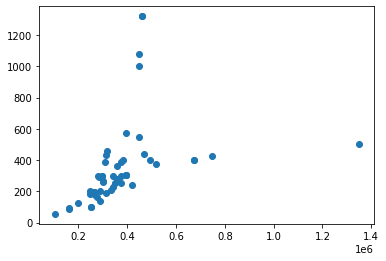

In [ ]:
price = df['price'][df['level5'] == 'Valdemorillo']
surface = df['surface'][df['level5'] == 'Valdemorillo']
plt.scatter(price, surface)
print('At first sight there is no corelation between surface and price. However, it could be said that the price increaces with the increase of the surface')

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

I will work with ['Fuenlabrada' 'Leganés' 'Getafe' 'Alcorcón']



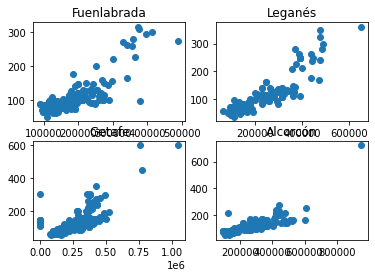

In [ ]:
print(f'I will work with {populations}')

def relation_price_surface(population, position):
    population_data_price = south_belt['price'][south_belt['level5'] == population]
    population_data_surface = south_belt['surface'][south_belt['level5'] == population]
    plt.subplot(2, 2, position)
    plt.scatter(population_data_price, population_data_surface)
    plt.title(population)

for population in populations:
    relation_price_surface(population, int(np.where(populations == population)[0] + 1))   

#### How many  real estate agencies the dataset contains? (★★☆) 

In [ ]:
total_of_agencies = len(df['realEstate_name'].unique())
print(f'There are {total_of_agencies} real estate agencies in the dataset')

There are 1822 real estate agencies in the dataset


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [ ]:
quantities = np.empty(total_of_populations)
all_populations = df['level5'].unique()

for population in all_populations:
    quantity = len(df[df['level5'] == population].index)
    quantities[np.where(all_populations == population)] = quantity

population_max_houses = np.array([all_populations[np.where(quantities == quantities.max())], quantities.max()], dtype=object)
print(f'{population_max_houses[0]} contains the most houses; there are {population_max_houses[1]} in that population')

[' Madrid Capital'] contains the most houses; there are 6643.0 in that population
